In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
X = np.load("X.npy")
y = np.load("y.npy")

In [3]:
def proj(v, z=1):
    n = v.shape[0]
    # check if v is already in the simplex
    if (np.sum(v) == z) and (v >= 0).all():
        return v
    
    u = np.sort(v)[::-1]
    
    usum = 0
    rho = 0
    for j in range(n):
        usum += u[j]
        cond = u[j] - 1/(j+1)*(usum - z) > 0
        
        if cond:
            rho = j
    
    theta = 1/(rho+1)*(np.sum(u[0:rho+1]) - z)
    
    w = (v - theta).clip(min=0)
    
    return w

In [4]:
def projsubgrad(beta, X, y, t):
    eta = 1e-4/np.sqrt(t+1)

    v = beta - eta*np.dot(X.T, np.sign(np.dot(X, beta)-y))

    beta = proj(v)
    
    return beta

In [5]:
def mirror(beta, X, y, t):
    eta = 1e-2/np.sqrt(t+1)
    
    beta_phi = np.zeros(beta.shape[0])
    for i in range(beta.shape[0]):
        if beta[i] == 0:
            beta_phi[i] = 1
        else:
            beta_phi[i] = np.log(beta[i]) + 1

    v_phi = beta_phi - eta*np.dot(X.T, np.sign(np.dot(X, beta)-y))
    v = np.exp(v_phi - 1)
    
    beta = v/np.sum(np.abs(v))
    return beta

In [6]:
def descent(update, X, y, T=int(1e3)):
    beta = np.zeros(X.shape[1])
    obj = []
    for i in range(beta.shape[0]):
        beta[i] = i
    
    beta = beta/np.sum(beta)
    for t in range(T):
        beta = update(beta, X, y, t)
        
        if(t % 1 == 0) or (t == T - 1):
            obj.append(la.norm(np.dot(X, beta) - y, 1))
            
            assert not np.isnan(obj[-1])
            
    return beta, obj

In [7]:
beta_sg, obj_sg = descent(projsubgrad, X, y)

In [8]:
beta_md, obj_md = descent(mirror, X, y)

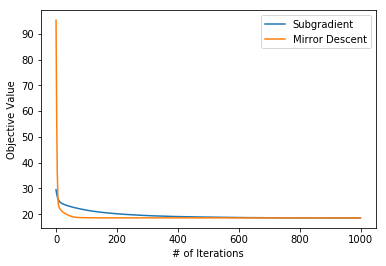

In [12]:
%matplotlib inline

plt.plot(obj_sg, label="Subgradient")
plt.plot(obj_md, label="Mirror Descent")
plt.xlabel("# of Iterations")
plt.ylabel("Objective Value")
plt.legend()

In [10]:
print(beta_sg)

[ 0.04692978  0.06189688  0.05171955  0.04751103  0.03632782  0.05557535
  0.03752663  0.07696163  0.0828334   0.03283647  0.06810513  0.04498984
  0.04913243  0.07917836  0.0062244   0.00748274  0.00165853  0.07188799
  0.06654852  0.07467352]


In [11]:
print(beta_md)

[ 0.04692454  0.06186973  0.05160668  0.04748676  0.03631284  0.05556176
  0.03749818  0.07696356  0.08281798  0.03284394  0.06823133  0.04506261
  0.0491562   0.07922241  0.00622744  0.00746525  0.00165623  0.07178647
  0.06660213  0.07470398]
